In [43]:
from gensim.models import Word2Vec
import tensorflow as tf
import os
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import BatchNormalization


In [44]:
print("Num GPUs: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs:  1


In [ ]:
# Encontra diretorio atual
atual_dir = os.getcwd()

# Acessa arquivo pkl das noticias
parent_dir = os.path.split(atual_dir)

parent_dir = os.path.split(parent_dir[0])

parent_dir = os.path.split(parent_dir[0])

caminho_model_word2vec = os.path.join(parent_dir[0], "Pre-processamento\\model_word2vec.model")

# Carrega o modelo Word2Vec para um arquivo
model_word2vec = Word2Vec.load(caminho_model_word2vec)

In [ ]:
# Carrega o valor de max_length de um arquivo pickle
caminho_max_length = os.path.join(parent_dir[0],"Pre-processamento\\max_length.pkl")
with open(caminho_max_length, 'rb') as f:
    max_length = pickle.load(f)

print("max_length: ", max_length)

max_length:  512


In [ ]:
# Carrega dataframe salvo em formato pickle
caminho_noticias = os.path.join(parent_dir[0],"Pre-processamento\\df_pre_processado.pkl")

with open(caminho_noticias, 'rb') as f:
    df = pickle.load(f)

df

,Texto,Categoria,label
0,"[poder, decidir, expulsar, deputado, federal, ...",Real,1
1,"[bolsonaro, liberal, completo, presidente, psl...",Real,1
2,"[ministro, stf, liberar, Andrea, Neves, prisao...",Real,1
3,"[apesar, abundancia, crescer, preocupacao, pre...",Real,1
4,"[harvard, mit, levarao, dilma, moro, suplicy, ...",Real,1
...,...,...,...
22279,"[encontrar, reunir, presidente, jair, Bolsonar...",Falso,0
22280,"[reabertura, complexo, parque, disney, orlar, ...",Falso,0
22281,"[publicacao, circular, rede, social, pedir, mi...",Real,1
22282,"[juiz, Wauner, Batista, Ferreiro, machadar, va...",Falso,0


In [ ]:
# Carrega os rótulos (labels) de um arquivo pickle
caminho_labels = os.path.join(parent_dir[0],"Pre-processamento\\labels.pkl")
with open(caminho_labels, 'rb') as f:
    labels = pickle.load(f)

In [ ]:
# Carrega os dados de treino de um arquivo pickle
caminho_treino = os.path.join(parent_dir[0],"Pre-processamento\\train_data.pkl")
with open(caminho_treino, 'rb') as f:
    X_train, y_train = pickle.load(f)

print("Dados treinamento carregados: ", X_train, y_train)

# Carrega os dados de validação de um arquivo pickle
caminho_validacao = os.path.join(parent_dir[0],"Pre-processamento\\val_data.pkl")
with open(caminho_validacao, 'rb') as f:
    X_val, y_val = pickle.load(f)

print("Dados validação carregados: ", X_val, y_val)

# Carrega os dados de teste de um arquivo pickle
caminho_teste = os.path.join(parent_dir[0],"Pre-processamento\\test_data.pkl")
with open(caminho_teste, 'rb') as f:
    X_test, y_test = pickle.load(f)

print("Dados teste carregados: ", X_test, y_test)

Dados treinamento carregados:  [[   49    10  6815 ...     0     0     0]
 [  231 37863   801 ...     0     0     0]
 [ 5549  7929   844 ...     0     0     0]
 ...
 [24951   263  1495 ...     0     0     0]
 [ 1190   577     1 ...  6227   313   221]
 [ 3961 18320    84 ...     0     0     0]] [0 1 1 ... 1 1 1]
Dados validação carregados:  [[  651    14    60 ...     0     0     0]
 [  142   518   758 ...     0     0     0]
 [ 3888    49    10 ... 12802  5248 52278]
 ...
 [12058    66   414 ...     0     0     0]
 [    2    32   837 ...     0     0     0]
 [  797   479   140 ...     0     0     0]] [0 1 1 ... 0 1 1]
Dados teste carregados:  [[  804   533  2201 ...     0     0     0]
 [ 1155     4  5132 ...  2934  7984 82425]
 [  176   390   167 ...     0     0     0]
 ...
 [  125    52   261 ...  7001 11818  7864]
 [  691   186   122 ...    13  5507  4899]
 [    2  4383   517 ...     0     0     0]] [0 1 1 ... 1 1 1]


In [ ]:
# Cria modelo LSTM
model = Sequential()

# Camada de embedding para representação de palavras
model.add(Embedding(input_dim=len(model_word2vec.wv.key_to_index) + 1, 
                    output_dim=model_word2vec.vector_size))

# Normalização de lote
model.add(BatchNormalization())

# Adiciona camada LSTM com 128 unidades
model.add(LSTM(units=128, kernel_regularizer=tf.keras.regularizers.l2(0.001)))  
model.add(Dropout(0.5))

# Adiciona camada densa com ativação sigmoide
model.add(Dense(1, activation='sigmoid'))  

# Configura parada antecipada baseada na perda de validação
early_stopping = EarlyStopping(monitor='val_loss', patience=3)  

# Compila o modelo com função de perda, otimizador e métricas
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', 'Precision', 'Recall'])  

# Treina o modelo com dados de treinamento e validação, usando parada antecipada como callback e exibindo o progresso
history = model.fit(X_train, y_train, epochs=40, batch_size=64, validation_data=(X_val, y_val), 
                    callbacks=[early_stopping], verbose=1) 


Epoch 1/40
244/244 [==============================] - 23s 87ms/step - loss: 0.7136 - accuracy: 0.5798 - precision: 0.6814 - recall: 0.2726 - val_loss: 0.8247 - val_accuracy: 0.4804 - val_precision: 0.4856 - val_recall: 0.9671
Epoch 2/40
244/244 [==============================] - 20s 83ms/step - loss: 0.6519 - accuracy: 0.6039 - precision: 0.7774 - recall: 0.2719 - val_loss: 0.6432 - val_accuracy: 0.6093 - val_precision: 0.9913 - val_recall: 0.2069
Epoch 3/40
244/244 [==============================] - 20s 83ms/step - loss: 0.5922 - accuracy: 0.6748 - precision: 0.9217 - recall: 0.3698 - val_loss: 0.5692 - val_accuracy: 0.6922 - val_precision: 0.9029 - val_recall: 0.4187
Epoch 4/40
244/244 [==============================] - 21s 85ms/step - loss: 0.5651 - accuracy: 0.6962 - precision: 0.9386 - recall: 0.4088 - val_loss: 0.5521 - val_accuracy: 0.7015 - val_precision: 0.9736 - val_recall: 0.4035
Epoch 5/40
244/244 [==============================] - 21s 84ms/step - loss: 0.5702 - accuracy: 0

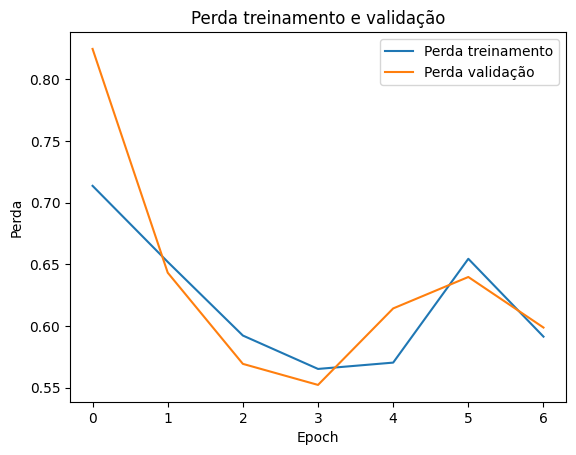

In [51]:
# Plota a perda (loss) e a perda de validação (val_loss) durante o treinamento
plt.plot(history.history['loss'], label='Perda treinamento')
plt.plot(history.history['val_loss'], label='Perda validação')
plt.title('Perda treinamento e validação')
plt.xlabel('Epoch')
plt.ylabel('Perda')
plt.xticks(range(len(history.history['loss'])))
plt.legend()
plt.show()

In [52]:
# Salva os arquivos
model.save('LSTMVanilla_model.h5')
np.save("X_test_LSTMVanilla.npy", X_test)
np.save("y_test_LSTMVanilla.npy", y_test)